In [61]:
import numpy as np
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from keras.models import Sequential, save_model
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import os
import cv2
from sklearn.metrics import accuracy_score

In [62]:
path = 'D:/Sign_language_recognition/Preprocessed/Training/'

In [63]:
gestures = os.listdir(path)

In [64]:
dict_labels = {'hello':1,
              'Liked':2,
              'No':3,
              'Out':4,
              'yes':5}

In [65]:
print(list(dict_labels.keys()))

['hello', 'Liked', 'No', 'Out', 'yes']


In [66]:
x, y = [], []
for ix in gestures:
    images = os.listdir(path+ ix)
    for cx in images:
        img_path = path +ix+ '/' + cx
        img = cv2.imread(img_path, 0)
        img = img.reshape((50,50,1))
        #normalizes the RGB codes by dividing it to the max RGB value
        img = img/255.0
        x.append(img)
        y.append(dict_labels[ix])

In [67]:
X = np.array(x)
Y = np.array(y)
#print(Y)
Y = np_utils.to_categorical(Y,num_classes=None)
#print(Y)
Y.shape

(3906, 6)

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='count'>

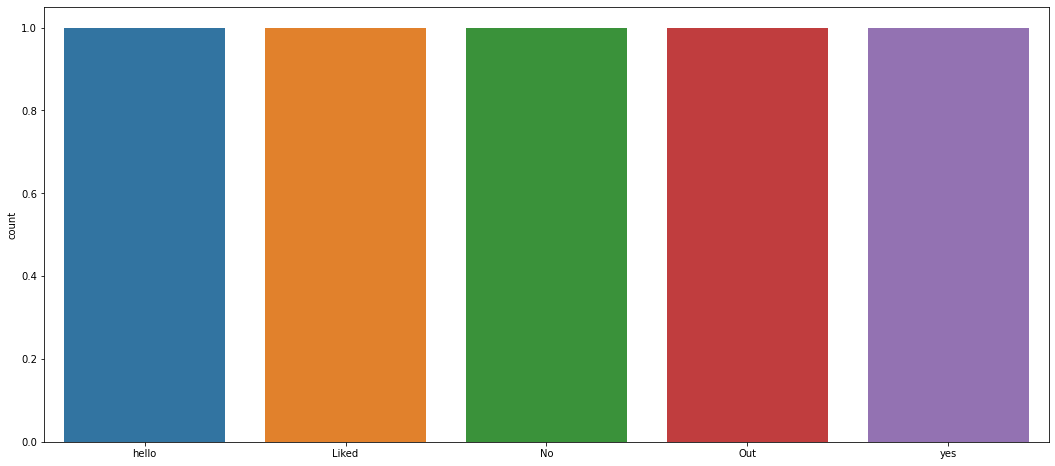

In [53]:
plt.figure(figsize = (18,8))
sns.countplot(x=list(dict_labels.keys()))

In [54]:
Y.shape

(3906, 6)

In [55]:
categories = Y.shape[1]
print(categories)

6


In [56]:
X, Y = shuffle(X, Y, random_state=0)

In [57]:
X.shape

(3906, 50, 50, 1)

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [59]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(2734, 50, 50, 1) (1172, 50, 50, 1)
(2734, 6) (1172, 6)


In [60]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(50,50 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(categories, activation = 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)             

In [37]:
model.compile(optimizer='Adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [38]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
22/22 [==============================] - 8s 363ms/step - loss: 1.2010 - accuracy: 0.5477 - val_loss: 0.0261 - val_accuracy: 0.9966
Epoch 2/10
22/22 [==============================] - 7s 337ms/step - loss: 0.0391 - accuracy: 0.9869 - val_loss: 8.9208e-04 - val_accuracy: 1.0000
Epoch 3/10
22/22 [==============================] - 8s 351ms/step - loss: 0.0031 - accuracy: 0.9999 - val_loss: 3.8803e-04 - val_accuracy: 1.0000
Epoch 4/10
22/22 [==============================] - 8s 363ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 3.3166e-04 - val_accuracy: 1.0000
Epoch 5/10
22/22 [==============================] - 8s 368ms/step - loss: 0.0022 - accuracy: 0.9988 - val_loss: 2.9935e-04 - val_accuracy: 1.0000
Epoch 6/10
22/22 [==============================] - 8s 354ms/step - loss: 5.2577e-04 - accuracy: 1.0000 - val_loss: 3.7904e-05 - val_accuracy: 1.0000
Epoch 7/10
22/22 [==============================] - 8s 354ms/step - loss: 0.0026 - accuracy: 0.9990 - val_loss: 0.0205 - val

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

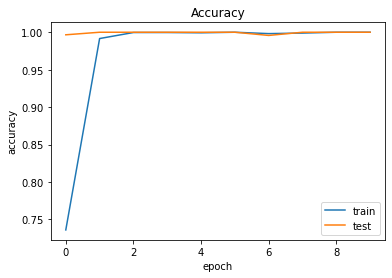

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [98]:
model.save('./new_model6.h5')

In [99]:
from keras.models import load_model


In [100]:
m = load_model('./new_model6.h5')

In [101]:
path1 = 'D:/Sign_language_recognition/Preprocessed/Testing/'
test_data = os.listdir(path1)

In [102]:
x, y = [], []
for ix in test_data:
    #images = os.listdir(path1+ix)
    for cx in range(1,50):
        img_path = path1+ix+'/'+str(cx) + '.jpg'
        img = cv2.imread(img_path, 0)
        img = img.reshape((50,50,1))
        img = img/255.0
        x.append(img)
        y.append(dict_labels[ix])

In [103]:
X_t = np.array(x)
y_t = np.array(y)
Y_t = np_utils.to_categorical(y_t)

In [104]:
X_t.shape

(245, 50, 50, 1)

In [105]:
y_pred = m.predict(X_t)

In [107]:
accuracy_score(Y_t, y_pred.round())

0.9755102040816327